In [1]:
import os
import numpy as np
from PIL import Image
from array import *
from random import shuffle
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/eugenekim'

In [3]:
os.chdir('/Users/eugenekim/PycharmProjects')

In [4]:
os.chdir('./')

In [5]:
os.getcwd()

'/Users/eugenekim/PycharmProjects'

In [15]:
# Load from and save to
Names = [['./asl-alphabet-classification/data/raw_data','train']]#, ['./asl-alphabet-classification/asl-alphabet-short','test']]

for name in Names:
    
    data_image = np.array([])
    data_label = np.array([])
    count = 0

    FileList = []
    for dirname in os.listdir(name[0]): # [1:] Excludes .DS_Store from Mac OS
        path = os.path.join(name[0],dirname)
        for filename in os.listdir(path):
            if filename.endswith(".jpg"):
                FileList.append(os.path.join(name[0],dirname,filename))

    shuffle(FileList) # Useful for further segmenting the validation set

    for filename in FileList:
        if count == 2:
            break
        label = filename.split('/')[3]

        Im = Image.open(filename)
        Im.thumbnail(size=(50,50))
        pixel = Im.load()

        width, height = Im.size

        for x in range(0,width):
            for y in range(0,height):
                grey_scale = sum(pixel[y,x])//3
                data_image = np.append(data_image,grey_scale)

        data_label = np.append(data_label, label) # labels start (one unsigned byte each)
        count += 1



In [16]:
data_image

array([95., 97., 98., ..., 89., 92., 97.])

In [17]:
data_label

array(['raw_data', 'raw_data'], dtype='<U32')

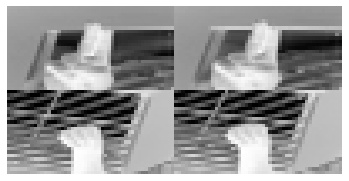

In [19]:
image = data_image.reshape(50,100)
plt.imshow(image, cmap='binary')
plt.axis('off')
plt.show()